In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import plotly.express as px

In [2]:
#Reading the .csv file
df=pd.read_csv(r"C:\Users\saidu\Downloads\dataset.csv")
df.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

In [3]:
#shape of the data
shape=df.shape
print("The Number of rows : {}".format(shape[0]))
print("The Number of columns : {}".format(shape[1]))

The Number of rows : 112634
The Number of columns : 17


In [4]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

# Exploratory data Analysis
Getting the insights from the data which includes
- Missing values.
- Duplicated Values.
- Outliers.
- Relationships.
- Distributions.

In [5]:
# Checking the Missing values
df.isna().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

# Insights
- There are 20 missing values in Model column.
- 286 missing values in Legislative District.
- 443 Missing values in Electric Utility.

In [6]:
# Checking the Duplicated values
df.duplicated().sum()

0

# Insights
- There are no duplicated values in the data.

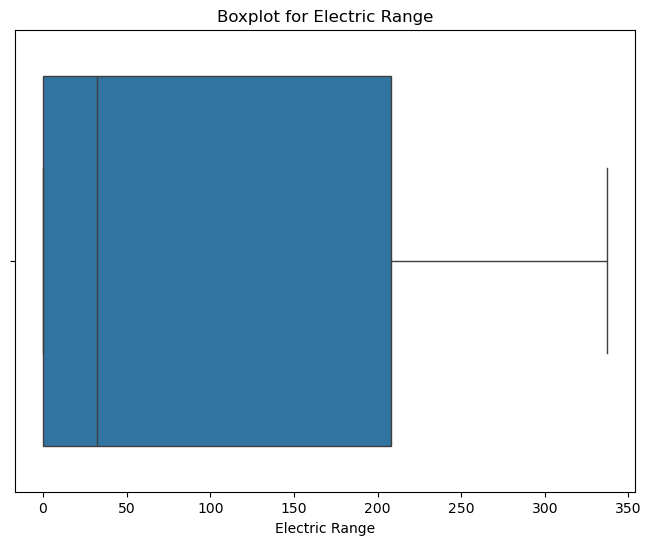

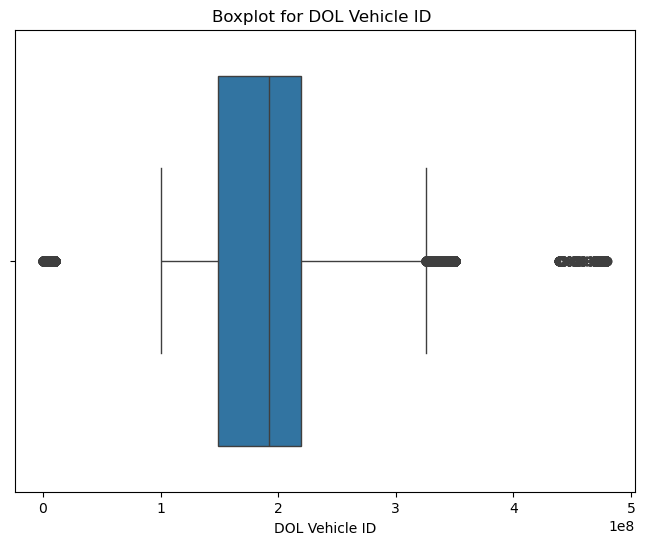

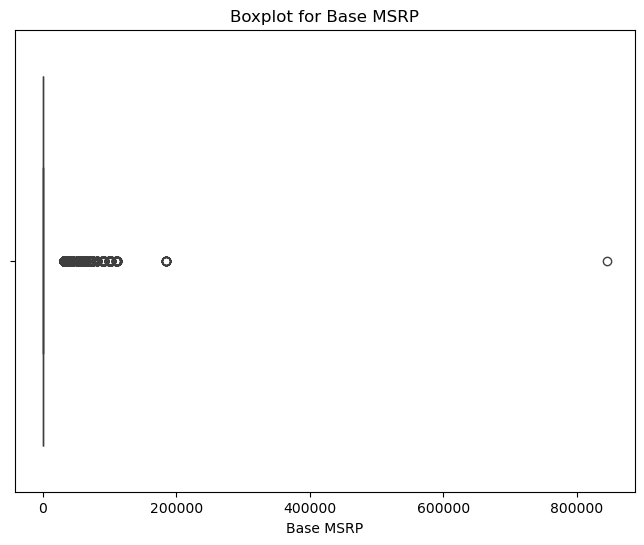

In [7]:
# Checking the outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=df["Electric Range"])
plt.title("Boxplot for Electric Range")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x=df["DOL Vehicle ID"])
plt.title("Boxplot for DOL Vehicle ID ")
plt.show

plt.figure(figsize=(8,6))
sns.boxplot(x=df["Base MSRP"])
plt.title("Boxplot for Base MSRP")
plt.show()

# Imputing the missing values

In [8]:
Missing_columns=["Model","Legislative District","2020 Census Tract"]

In [9]:
SIM=SimpleImputer(strategy="most_frequent")
SIM

SimpleImputer(strategy='most_frequent')

In [10]:
df[["Model"]]=SIM.fit_transform(df[["Model"]])

In [11]:
df["Model"].isna().sum()

0

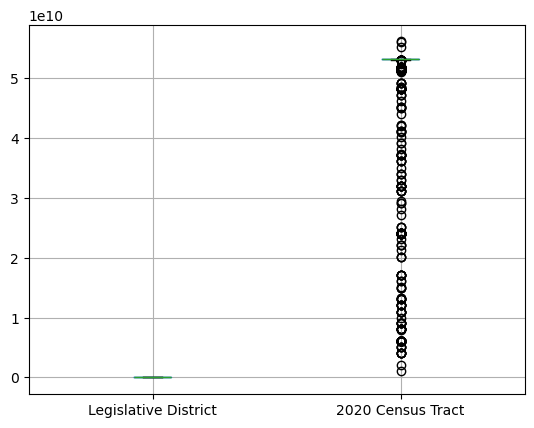

In [12]:
df[["Legislative District","2020 Census Tract"]].boxplot()
plt.show()

In [13]:
SIM=SimpleImputer(strategy="mean")
df[["2020 Census Tract"]]=SIM.fit_transform(df[["2020 Census Tract"]])
df["2020 Census Tract"].isna().sum()

0

In [14]:
SIM=SimpleImputer(strategy="median")
df[["Legislative District"]]=SIM.fit_transform(df[["Legislative District"]])
df["Legislative District"].isna().sum()

0

# Univariate Analysis
- Analysing the data using single feature.

In [15]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

## What is the distribution of Electric Range?

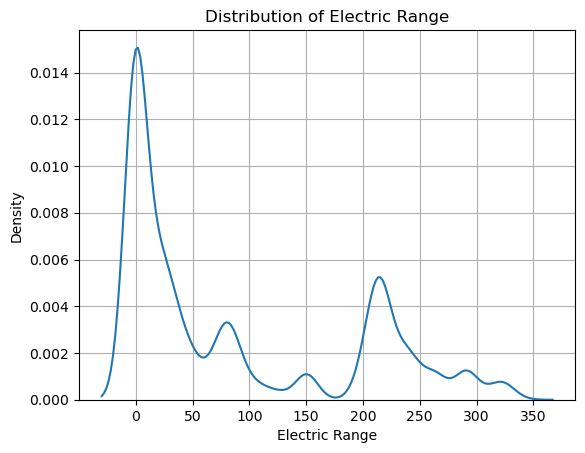

In [16]:
sns.kdeplot(x=df["Electric Range"])
plt.title("Distribution of Electric Range")
plt.grid()
plt.show()

# Insights
- In between 0 to 45 the electric range density is more compared to 5 to 100.
- Above 350 the electric range is decreasing.

# Distribution of City?

In [17]:
d1=pd.DataFrame(df["City"].value_counts())
d1

count
City               
Seattle       20305
Bellevue       5921
Redmond        4201
Vancouver      4013
Kirkland       3598
...             ...
Hartline          1
Gaithersburg      1
El Paso           1
Klickitat         1
Worley            1

[629 rows x 1 columns]

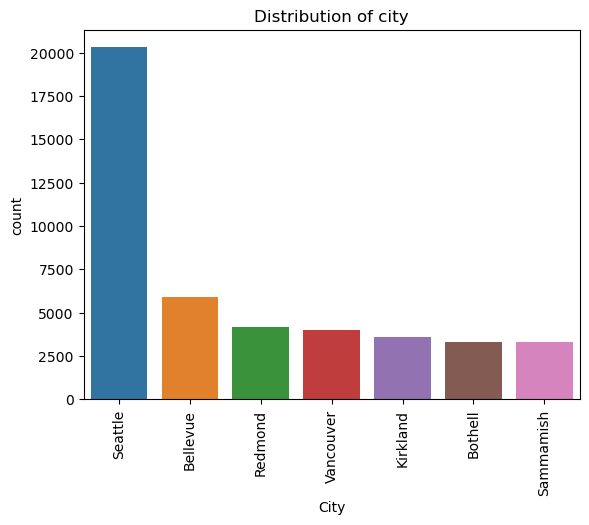

In [18]:
sns.barplot(x=d1.index[:7],y=d1["count"][:7],hue=d1.index[:7])
plt.title("Distribution of city")
plt.xticks(rotation=90)
plt.show()

# Insights
- Seattle is ranked more in distribution of cities.
- Worley is less compared to other cities.

## Dstribution of Make?

In [19]:
d2=pd.DataFrame(df["Make"].value_counts())
d2

count
Make                 
TESLA           52078
NISSAN          12880
CHEVROLET       10182
FORD             5819
BMW              4680
KIA              4483
TOYOTA           4405
VOLKSWAGEN       2514
AUDI             2332
VOLVO            2288
CHRYSLER         1794
HYUNDAI          1412
JEEP             1152
RIVIAN            885
FIAT              822
PORSCHE           818
HONDA             792
MINI              632
MITSUBISHI        588
POLESTAR          558
MERCEDES-BENZ     506
SMART             273
JAGUAR            219
LINCOLN           168
CADILLAC          108
LUCID MOTORS       65
SUBARU             59
LAND ROVER         38
LEXUS              33
FISKER             20
GENESIS            18
AZURE DYNAMICS      7
TH!NK               3
BENTLEY             3

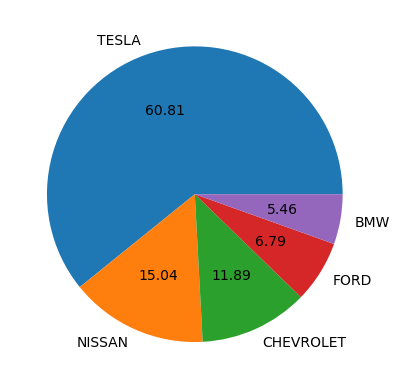

In [20]:
plt.pie(x=d2["count"][:5],labels=d2.index[:5],autopct="%0.2f")
plt.show()

# Insights
- Tesla  has the highest propotion in the make compared to others.

# Distribution of State?

In [21]:
d3=pd.DataFrame(df["State"].value_counts())
d3

count
State        
WA     112348
CA         76
VA         36
MD         26
TX         14
CO          9
NV          8
GA          7
NC          7
CT          6
DC          6
FL          6
AZ          6
IL          6
SC          5
OR          5
NE          5
HI          4
UT          4
AR          4
NY          4
TN          3
KS          3
MO          3
PA          3
MA          3
LA          3
NJ          3
NH          2
OH          2
WY          2
ID          2
KY          1
RI          1
ME          1
MN          1
SD          1
WI          1
NM          1
AK          1
MS          1
AL          1
DE          1
OK          1
ND          1

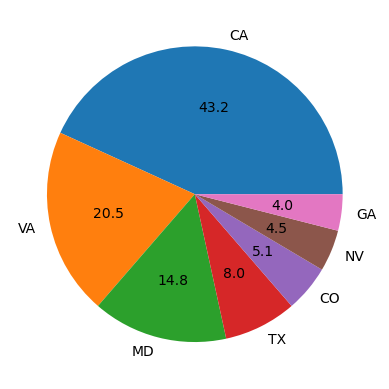

In [22]:
plt.pie(x=d3["count"][1:8],labels=d3.index[1:8],autopct="%0.1f")
plt.show()

# Bivariate Analysis
- Analysing the data using two features.

## Which state has more Battery and least plug-in-hybrid electric type vehicles?

In [23]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [24]:
g1=pd.crosstab(index=df["State"],columns=df["Electric Vehicle Type"]).sort_values(by=["Battery Electric Vehicle (BEV)","Plug-in Hybrid Electric Vehicle (PHEV)"],ascending=False)
g1.head()
len(g1)

45

In [25]:
g1.index

Index(['WA', 'CA', 'VA', 'MD', 'TX', 'CO', 'NV', 'IL', 'AZ', 'DC', 'SC', 'GA',
       'NC', 'FL', 'NE', 'AR', 'NY', 'PA', 'TN', 'OR', 'HI', 'UT', 'KS', 'LA',
       'MA', 'MO', 'ID', 'OH', 'WY', 'CT', 'NH', 'DE', 'MN', 'MS', 'NM', 'RI',
       'SD', 'WI', 'NJ', 'AK', 'AL', 'KY', 'ME', 'ND', 'OK'],
      dtype='object', name='State')

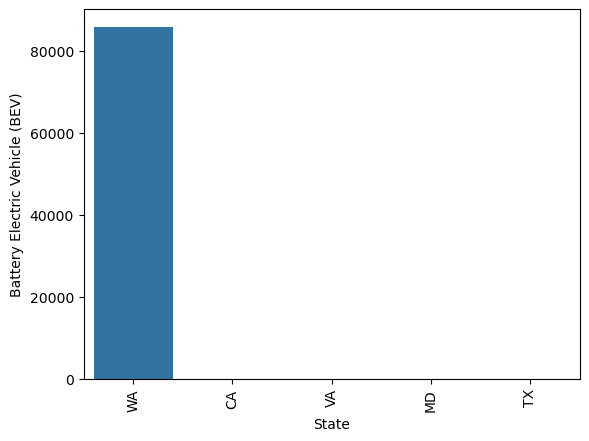

In [26]:
sns.barplot(x=g1.index[:5],y=g1["Battery Electric Vehicle (BEV)"][:5],hue=g1.index[:5])
plt.xticks(rotation=90)
plt.show()

## Insights
- WA has more Battery Electric vehicles compared to other states.

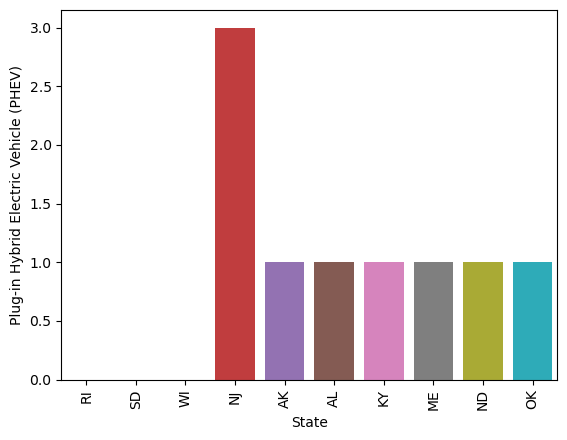

In [27]:
sns.barplot(x=g1.index[35:45],y=g1["Plug-in Hybrid Electric Vehicle (PHEV)"][35:45],hue=g1.index[35:45])
plt.xticks(rotation=90)
plt.show()

## Insights
- OK,ND has less plug-in-hybrid electric vehicles.

## What is the relationship between the Electric Range and Base MSRP of electric vehicles?

In [28]:
df[["Electric Range","Base MSRP"]].corr()

Electric Range  Base MSRP
Electric Range        1.000000   0.085025
Base MSRP             0.085025   1.000000

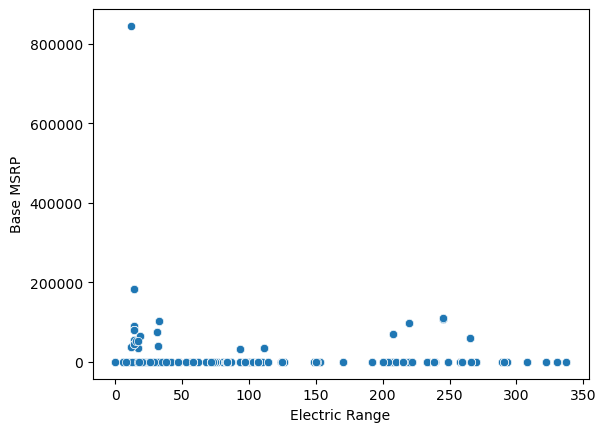

In [29]:
sns.scatterplot(x=df["Electric Range"],y=df["Base MSRP"])
plt.show()

## Insights
- Since the correlation is minimal, Electric Range is not a reliable predictor of the Base MSRP

## How does Model Year influence the Electric Range across different Make

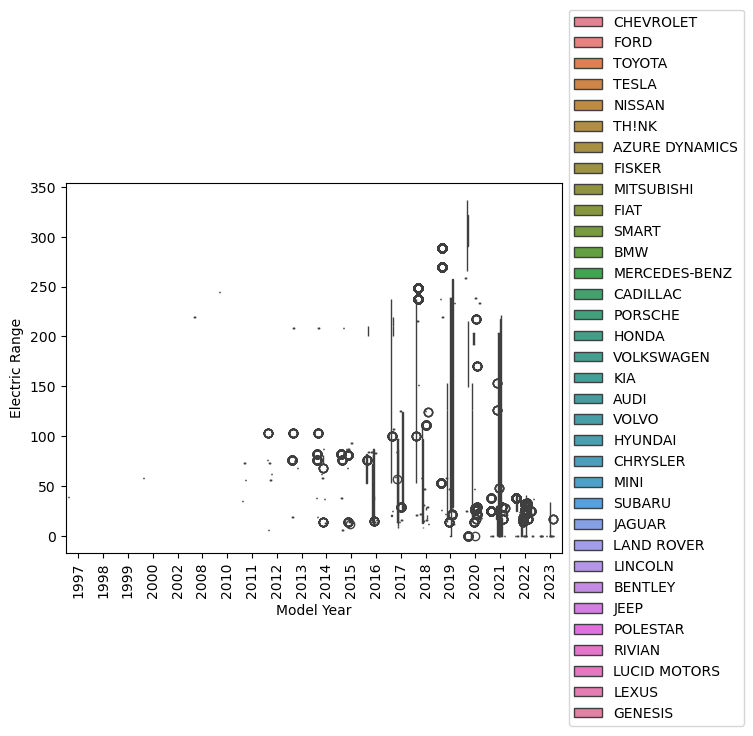

In [30]:
sns.boxplot(x=df["Model Year"],y=df["Electric Range"],hue=df["Make"])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.show()

## How do various numerical features (e.g., Electric Range, Base MSRP) interact with each other for different Electric Vehicle Type categories (BEV vs. PHEV)?



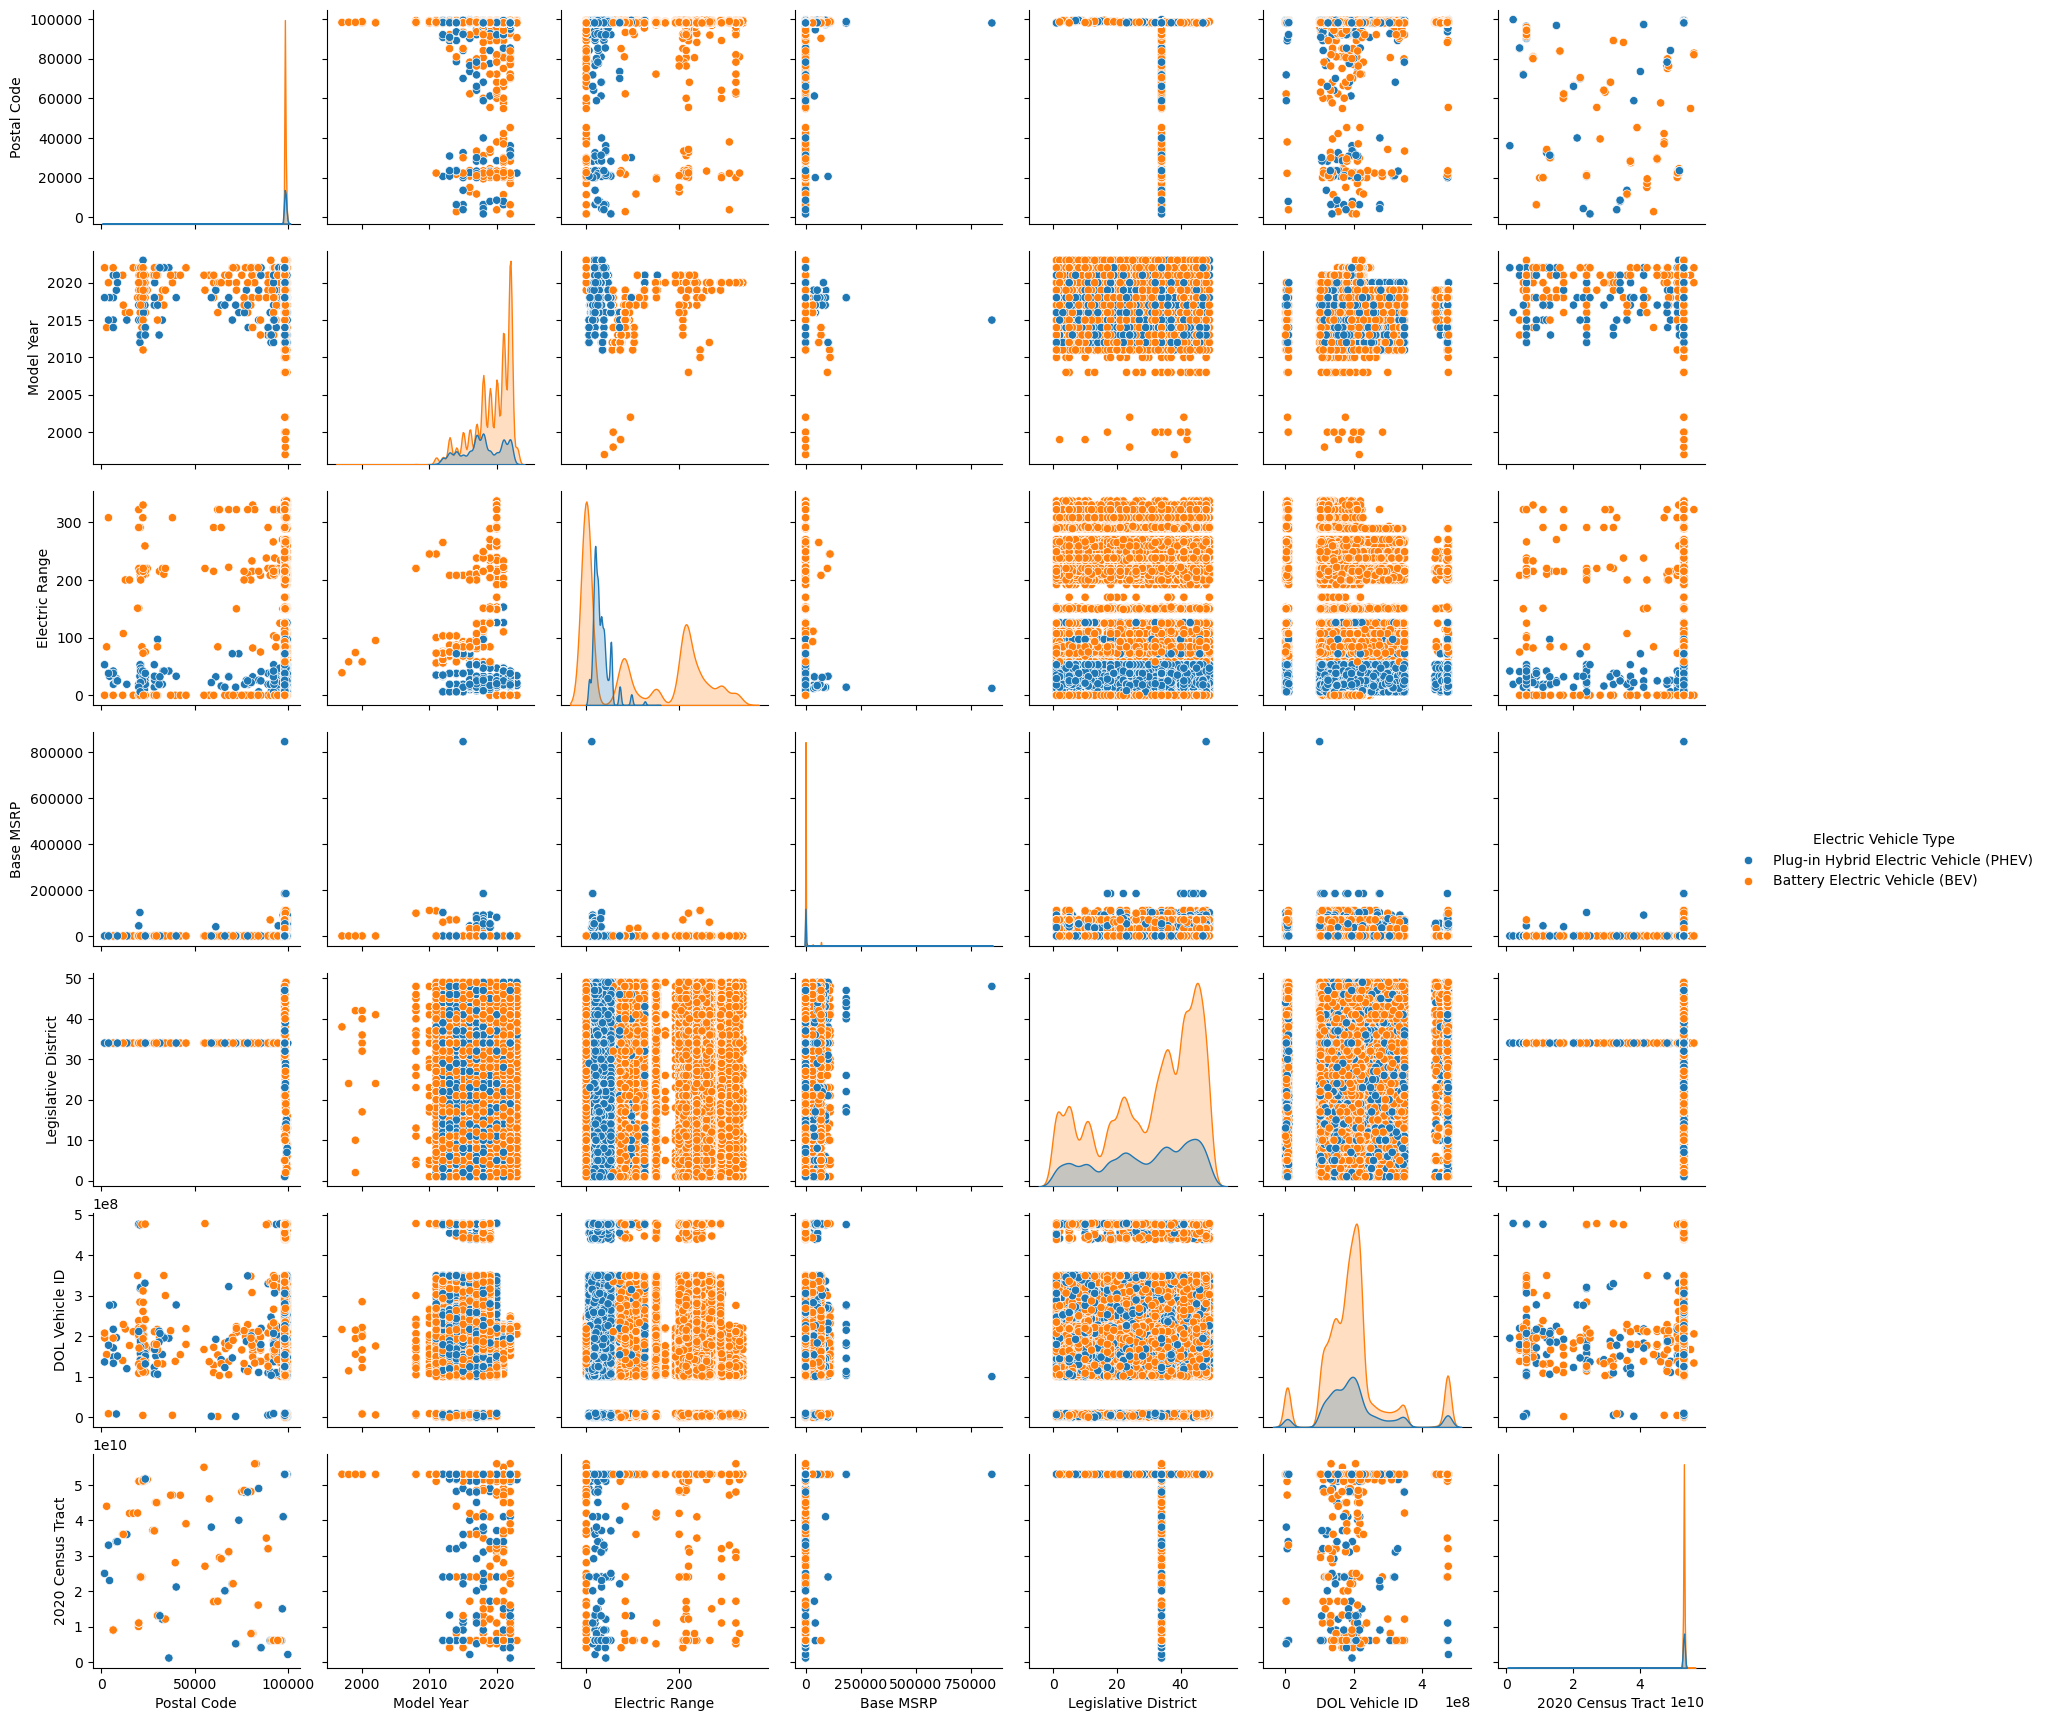

In [51]:
sns.pairplot(df, hue='Electric Vehicle Type', diag_kind='kde')
plt.show()

## Create a Choropleth using plotly.express to display the number of EV vehicles based on location.


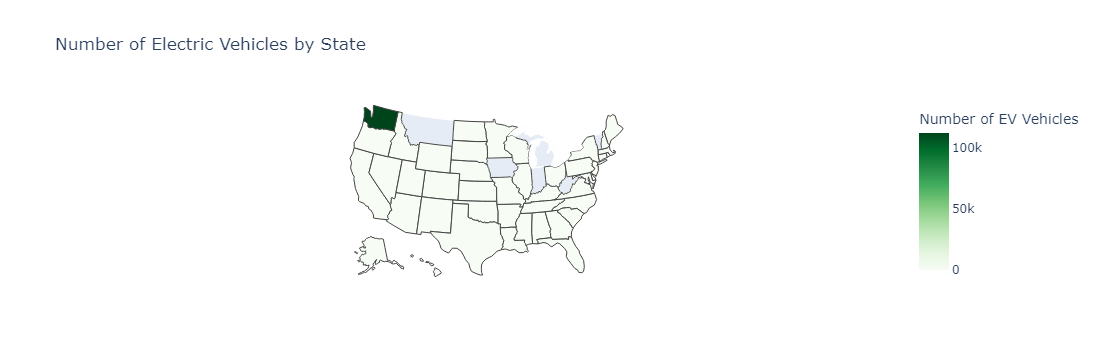

In [31]:
state_data = df.groupby('State')['VIN (1-10)'].count().reset_index()
state_data.columns = ['State', 'EV Count']

fig = px.choropleth(state_data, 
                    locations='State', 
                    locationmode='USA-states', 
                    color='EV Count', 
                    color_continuous_scale='greens', 
                    scope='usa',
                    labels={'EV Count': 'Number of EV Vehicles'},
                    title='Number of Electric Vehicles by State')

fig.show()


In [98]:
!pip install bar-chart-race

   ---------------------------------------- 0.0/156.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/156.8 kB ? eta -:--:--
   -- ------------------------------------- 10.2/156.8 kB ? eta -:--:--
   -- ------------------------------------- 10.2/156.8 kB ? eta -:--:--
   ---------- ---------------------------- 41.0/156.8 kB 281.8 kB/s eta 0:00:01
   -------------------------------------  153.6/156.8 kB 919.0 kB/s eta 0:00:01
   -------------------------------------- 156.8/156.8 kB 857.2 kB/s eta 0:00:00


## Create a Racing Bar Plot to display the animation of EV Make and its count each year

In [107]:
df.columns

Index(['State', 'VIN (1-10)'], dtype='object')

In [109]:
df

State  VIN (1-10)
0    CA       15000
1    TX        7000
2    NY        6000
3    FL        8000
4    IL        5000

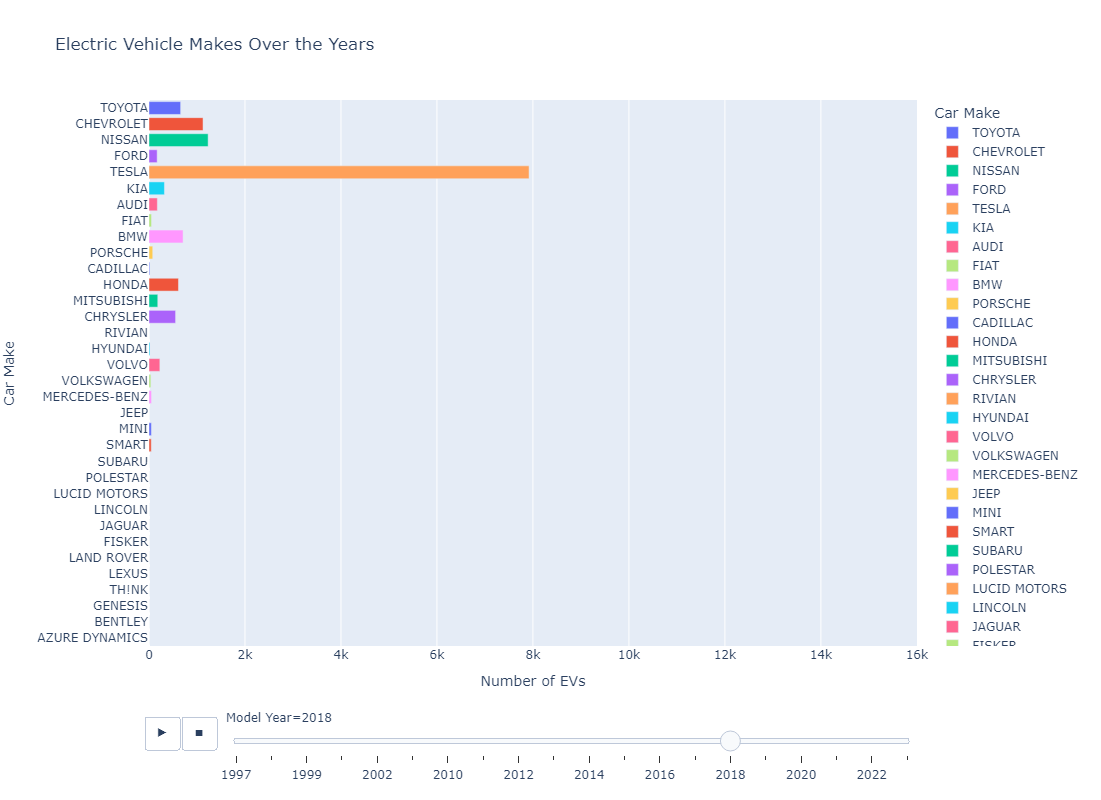

In [38]:
ev_make_by_year = df.groupby(['Model Year', 'Make']).size().reset_index(name='EV Count')

# Step 2: Create a list of all unique makes
unique_makes = df['Make'].unique()

# Step 3: Ensure all makes appear in every year by filling missing combinations
all_years = pd.DataFrame({'Model Year': sorted(df['Model Year'].unique())})
all_combinations = all_years.assign(key=1).merge(pd.DataFrame({'Make': unique_makes, 'key':1}), on='key').drop('key', axis=1)
ev_make_by_year_full = all_combinations.merge(ev_make_by_year, on=['Model Year', 'Make'], how='left').fillna(0)

# Step 4: Convert EV Count to integer (since it was NaN before)
ev_make_by_year_full['EV Count'] = ev_make_by_year_full['EV Count'].astype(int)

# Step 5: Create the animated racing bar plot with increased height
fig = px.bar(
    ev_make_by_year_full,  # Data
    x='EV Count',  # X-axis shows the count of EVs
    y='Make',  # Y-axis shows the car Make
    color='Make',  # Color by car Make
    animation_frame='Model Year',  # Animation by year
    orientation='h',  # Horizontal bar chart
    title='Electric Vehicle Makes Over the Years',
    labels={'EV Count':'Number of EVs', 'Make':'Car Make'},  # Axis labels
    range_x=[0, ev_make_by_year_full['EV Count'].max() * 1.1],  # Dynamically set x-axis range
    height=800  # Increased height for better visibility
)

# Step 6: Show the plot
fig.show()